In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras import Sequential, layers, optimizers, callbacks, utils, initializers
from sklearn.model_selection import train_test_split

# Set global random seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ---------------------------
# 1. Load the Dataset
# ---------------------------
# Load your CSV file. Adjust the file path as needed.
data = pd.read_csv('set6All.csv')

# Assume the CSV has a column named 'label' and the remaining 63 columns are features.
# Verify column names if needed with: print(data.columns)
X = data.drop('label', axis=1).values  # shape: (n_samples, 63)
y = data['label'].values               # shape: (n_samples,)

# Convert string labels to numeric indices if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# ---------------------------
# 2. Train / Validation / Test Split
# ---------------------------
# First, split out the test set (20% of the data)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=seed_value
)

# Then, split the remaining data into training and validation sets.
# Here, using 25% of the remaining data for validation (~20% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=seed_value
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
print("Test samples:", X_test.shape[0])

# Determine the number of classes
num_classes = len(np.unique(y))

# One-hot encode the labels for training, validation, and test sets
y_train_cat = utils.to_categorical(y_train, num_classes=num_classes)
y_val_cat = utils.to_categorical(y_val, num_classes=num_classes)
y_test_cat = utils.to_categorical(y_test, num_classes=num_classes)

# ---------------------------
# 3. Build TensorFlow Datasets (Optional)
# ---------------------------
batchSize = 32

dsTrain = tf.data.Dataset.from_tensor_slices((X_train, y_train_cat))
dsTrain = dsTrain.shuffle(buffer_size=1000, seed=seed_value).batch(batchSize).prefetch(tf.data.AUTOTUNE)

dsVal = tf.data.Dataset.from_tensor_slices((X_val, y_val_cat))
dsVal = dsVal.batch(batchSize).prefetch(tf.data.AUTOTUNE)

dsTest = tf.data.Dataset.from_tensor_slices((X_test, y_test_cat))
dsTest = dsTest.batch(batchSize).prefetch(tf.data.AUTOTUNE)

2025-03-19 04:28:58.147049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742329738.163217   13459 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742329738.168180   13459 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-19 04:28:58.185138: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training samples: 72900
Validation samples: 24300
Test samples: 24300


I0000 00:00:1742329740.880460   13459 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6482 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:08:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        65,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 27)             │         3,483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 430,107 (1.64 MB)

 Trainable params: 430,107 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


I0000 00:00:1742329743.200599   13525 service.cc:148] XLA service 0x7b19ac00ea00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742329743.200630   13525 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 SUPER, Compute Capability 7.5
2025-03-19 04:29:03.249377: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742329743.372081   13525 cuda_dnn.cc:529] Loaded cuDNN version 90600


  72/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0738 - loss: 3.2089

I0000 00:00:1742329744.571588   13525 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2279/2279 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5926 - loss: 1.2299
Epoch 1: val_loss improved from inf to 0.09985, saving model to DL.keras
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5927 - loss: 1.2296 - val_accuracy: 0.9688 - val_loss: 0.0998 - learning_rate: 0.0010
Epoch 2/50
2268/2279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9235 - loss: 0.2276
Epoch 2: val_loss improved from 0.09985 to 0.06668, saving model to DL.keras
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9235 - loss: 0.2275 - val_accuracy: 0.9788 - val_loss: 0.0667 - learning_rate: 0.0010
Epoch 3/50
2254/2279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9430 - loss: 0.1669
Epoch 3: val_loss improved from 0.06668 to 0.05206, saving model to DL.keras
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9431 - loss: 0.1668 - val_accuracy: 0.9818 - val_loss: 0.0521 - learning_rate: 0.0010
Epoch 4/50
2251/2279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9575 - loss: 0.1292
Epo

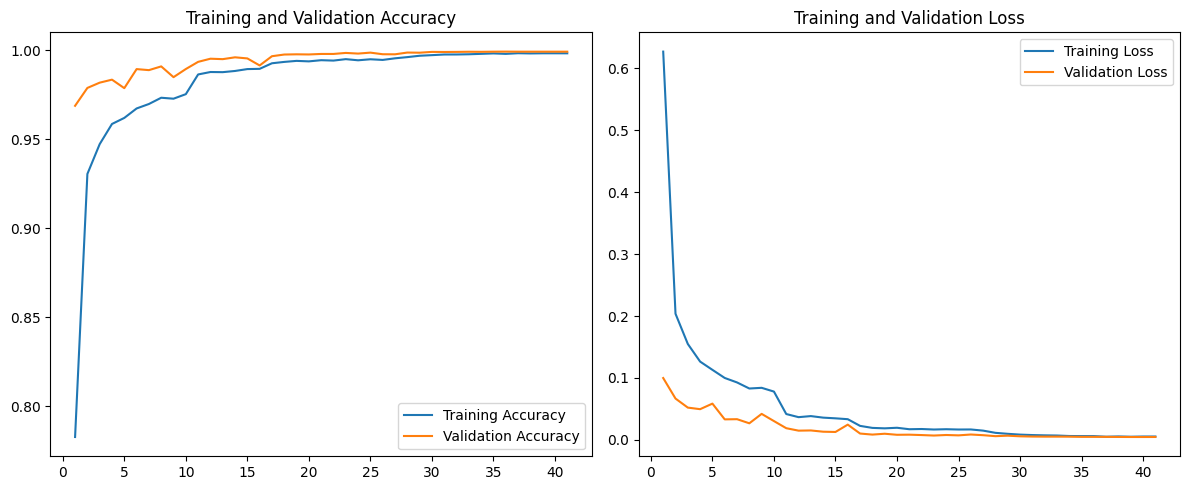

In [2]:
# ---------------------------
# 4. Build the Model with Explicit Weight Initializers
# ---------------------------
# Here we build an MLP with explicit initializers using a fixed seed.
model = Sequential([
    layers.Input(shape=(63,)),  # 63 features
    layers.Dense(1024, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=seed_value)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=seed_value)),
    layers.Dense(256, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=seed_value)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=seed_value)),
    layers.Dense(num_classes, activation='softmax', kernel_initializer=initializers.GlorotUniform(seed=seed_value))
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ---------------------------
# 5. Setup Callbacks
# ---------------------------
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=2, min_lr=1e-6, verbose=1
)
model_checkpoint = callbacks.ModelCheckpoint(
    filepath='DL.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)
tensorboard_cb = callbacks.TensorBoard(log_dir='templogs')

cb_list = [early_stopping, reduce_lr, model_checkpoint, tensorboard_cb]

# ---------------------------
# 6. Train the Model & Measure Training Time
# ---------------------------
epochs = 50
start_time = time.time()

history = model.fit(
    dsTrain,
    validation_data=dsVal,
    epochs=epochs,
    callbacks=cb_list,
    verbose=1
)

elapsed = time.time() - start_time


# ---------------------------
# 7. Evaluate on Test Set
# ---------------------------
test_loss, test_accuracy = model.evaluate(dsTest)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
hours = int(elapsed // 3600)
minutes = int((elapsed % 3600) // 60)
seconds = elapsed % 60
print(f"Training time: {hours}h {minutes}m {seconds:.2f}s")

# ---------------------------
# 8. Plot Training and Validation Accuracy and Loss
# ---------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()
